In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [3]:
df = pd.read_csv('E:/SLIIT/Y4S1/ML/Asignment/train_u6lujuX_CVtuZ9i.csv') # read data set from local machine

In [4]:
df #view the data set

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df.columns #view column names

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.info(show_counts=True) #get cloumn informations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# check missing values and duplicate values
def count_percent(df):
    data_columns = pd.DataFrame({'Count Missing': df.isnull().sum(),
                                'Missing Percentage': df.isnull().sum()*100/df.shape[0],
                                'Count Duplicate Rows': df.duplicated().sum(),
                                })
    return data_columns
count_percent(df)   

,Count Missing,Missing Percentage,Count Duplicate Rows
Loan_ID,0,0.000000,0
Gender,13,2.117264,0
Married,3,0.488599,0
Dependents,15,2.442997,0
Education,0,0.000000,0
Self_Employed,32,5.211726,0
ApplicantIncome,0,0.000000,0
CoapplicantIncome,0,0.000000,0
LoanAmount,22,3.583062,0
Loan_Amount_Term,14,2.280130,0


In [8]:
cols = ['Gender','Married','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']

for col in cols:
    df[col] = df[col].fillna(df[col].dropna().mode().values[0])

In [9]:
#drop Loan_ID column
df.drop('Loan_ID', axis = 1, inplace = True)

In [10]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [11]:
toNumeric =  {'Male':1, 'Female':2}
df['Gender'] = df['Gender'].map(toNumeric)

toNumeric = {'Graduate':1, 'Not Graduate':0}
df['Education'] = df['Education'].map(toNumeric)

toNumeric = {'Urban': 1, 'Semiurban': 2,'Rural': 3,}
df['Property_Area'] = df['Property_Area'].map(toNumeric)

toNumeric = {'Y':1, 'N':0}
df['Loan_Status'] = df['Loan_Status'].map(toNumeric)

toNumeric = {'Yes':1, 'No':0}
df['Married'] = df['Married'].map(toNumeric)

df['Dependents'] = df['Dependents'].replace(['3+'], 3)

toNumeric = {'Yes':1, 'No':0}
df['Self_Employed'] = df['Self_Employed'].map(toNumeric)

In [12]:
df['Dependents'] = pd.to_numeric(df['Dependents'])

In [13]:
# View preprocessed data
df 


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,120.0,360.0,1.0,1,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,3,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2,0,0,1,0,2900,0.0,71.0,360.0,1.0,3,1
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,3,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,1


In [14]:
y = df['Loan_Status']
X = df.drop('Loan_Status', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 40)

In [15]:
# View train dataset 
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
98,1,1,0,0,0,4188,0.0,115.0,180.0,1.0,2
135,1,1,3,1,0,4000,7750.0,290.0,360.0,1.0,2
290,1,1,0,1,0,3075,2416.0,139.0,360.0,1.0,3
560,1,1,2,0,0,3675,242.0,108.0,360.0,1.0,2
133,1,1,0,1,1,3459,0.0,25.0,120.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
440,1,0,0,1,0,3660,5064.0,187.0,360.0,1.0,2
165,1,1,0,1,0,3707,3166.0,182.0,360.0,1.0,3
7,1,1,3,1,0,3036,2504.0,158.0,360.0,0.0,2
219,2,1,2,1,0,4283,2383.0,127.0,360.0,1.0,2


In [16]:
# View test dataset 
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
439,2,1,0,0,1,7142,0.0,138.0,360.0,1.0,3
348,1,1,0,1,0,6333,4583.0,259.0,360.0,1.0,2
459,1,1,0,1,0,8334,0.0,160.0,360.0,1.0,2
71,1,1,2,0,1,1875,1875.0,97.0,360.0,1.0,2
51,2,0,0,1,0,3086,0.0,120.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
168,1,0,0,1,0,2237,0.0,63.0,480.0,0.0,2
66,1,0,0,0,0,3200,2254.0,126.0,180.0,0.0,1
161,1,1,0,1,0,7933,0.0,275.0,360.0,1.0,1
557,1,1,3,1,1,10139,0.0,260.0,360.0,1.0,2


              precision    recall  f1-score   support

           0       0.70      0.33      0.44        43
           1       0.78      0.95      0.86       111

    accuracy                           0.77       154
   macro avg       0.74      0.64      0.65       154
weighted avg       0.76      0.77      0.74       154

77.27% Accurate


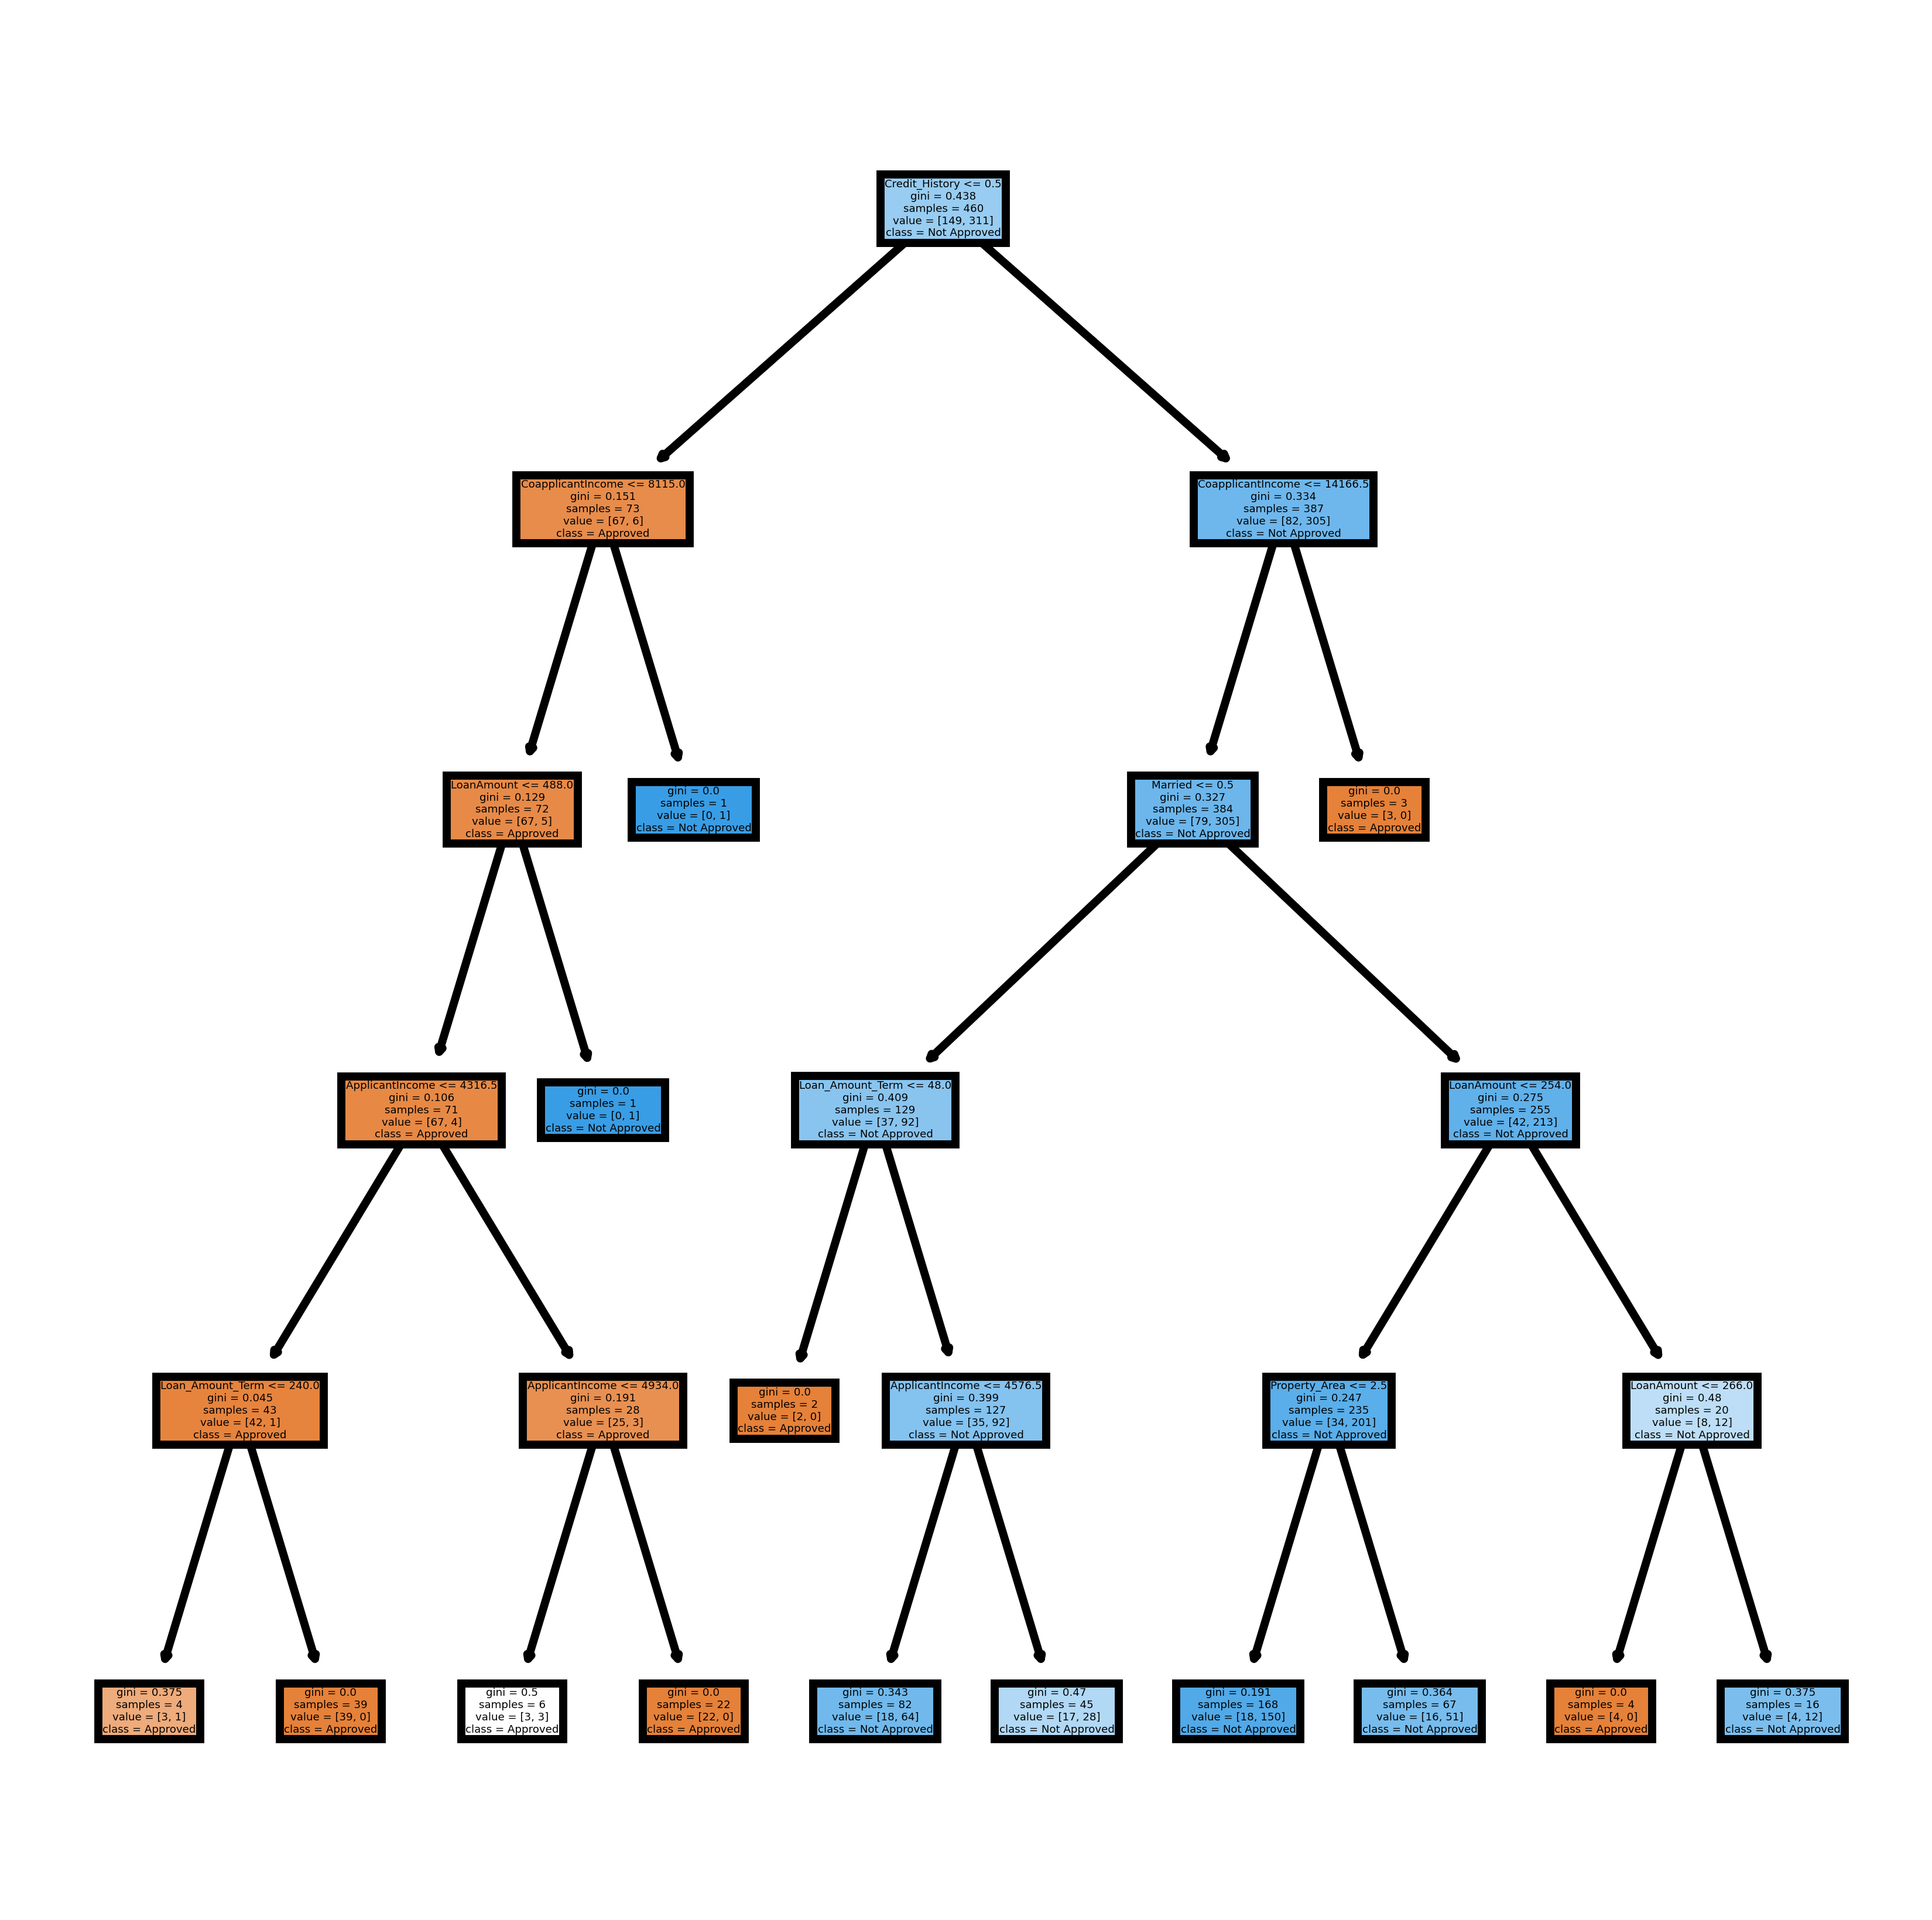

In [64]:
# Decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV


DT = DecisionTreeClassifier(max_depth = 5 )
DT.fit(X_train, y_train)

y_predict = DT.predict(X_test)

# View Report(DTree)
print(classification_report(y_test, y_predict))



# View Accuracy(Dtree) 
DT_SC = accuracy_score(y_predict,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

Decision_Tree=pd.DataFrame({'y_test':y_test,'prediction':y_predict})


fn=['Gender', 'Married', 'Dependents', 'Education',
    'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']

cn=['Approved','Not Approved']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)

tree.plot_tree(DT,
           feature_names = fn, 
           class_names=cn,
           filled = True);



              precision    recall  f1-score   support

           0       0.68      0.40      0.50        43
           1       0.80      0.93      0.86       111

    accuracy                           0.78       154
   macro avg       0.74      0.66      0.68       154
weighted avg       0.77      0.78      0.76       154

77.92% Accurate


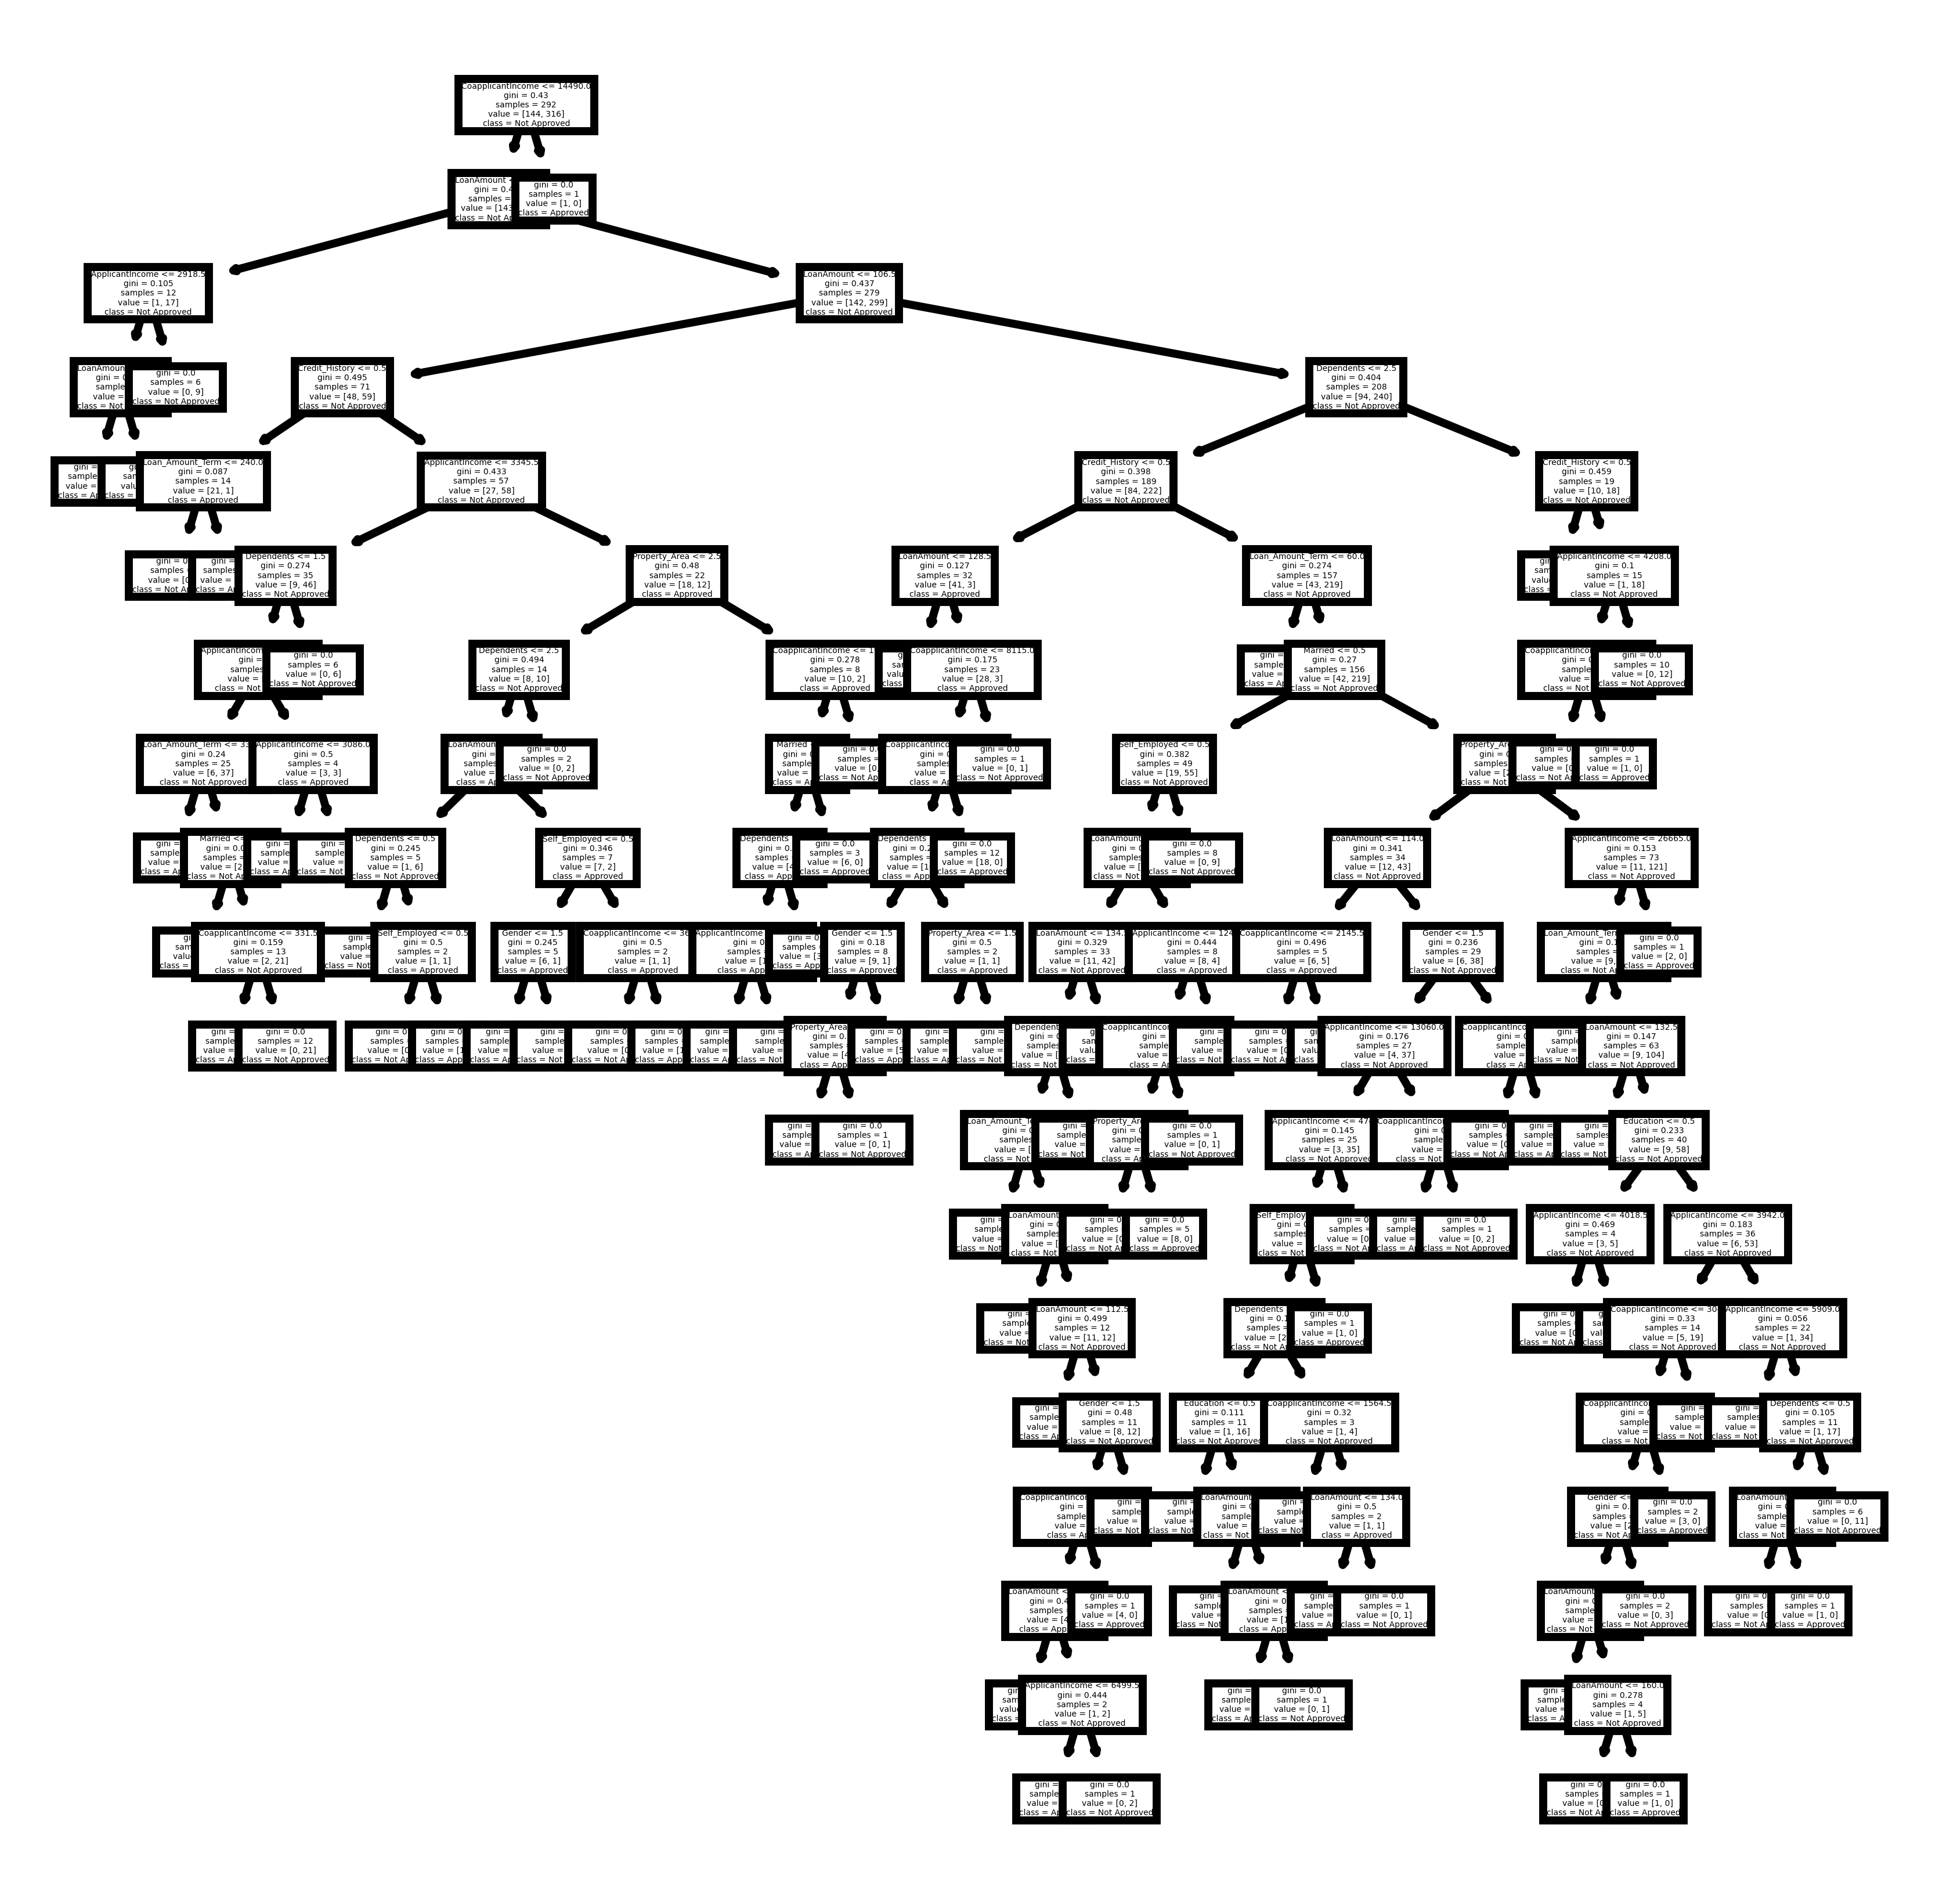

In [65]:
# Random Forest Classifier algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

randomF = RandomForestClassifier()
randomF.fit(X_train, y_train)

y_predict = randomF.predict(X_test)

# View Report(Random Forest)
print(classification_report(y_test, y_predict))

# View Accuracy(Random Forest) 
randomF_SC = accuracy_score(y_predict,y_test)
print(f"{round(randomF_SC*100,2)}% Accurate")
y_predict = randomF.predict(X_test)



fn=['Gender', 'Married', 'Dependents', 'Education',
    'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']

cn=['Approved','Not Approved']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)

plot_tree(randomF[0], ax=axes,  feature_names=fn, class_names=cn)
plt.show()


In [70]:
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

XGB = XGBClassifier()
XGB.fit(X_train, y_train)


y_predict = XGB.predict(X_test)

# View Report(Xgboost)
print(classification_report(y_test, y_predict))

# View Accuracy(Xgboost) 
XGB_SC = accuracy_score(y_predict,y_test)
print(f"{round(XGB_SC*100,2)}% Accurate")




              precision    recall  f1-score   support

           0       0.71      0.47      0.56        43
           1       0.82      0.93      0.87       111

    accuracy                           0.80       154
   macro avg       0.77      0.70      0.72       154
weighted avg       0.79      0.80      0.78       154

79.87% Accurate


In [69]:
# Logistic Regression algorithm
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, y_train)

y_predict = LR.predict(X_test)

# View Report(LogisticRegression)
print(classification_report(y_test, y_predict))

# View Accuracy(LogisticRegression) 
LR_SC = accuracy_score(y_predict,y_test)
print(f"{round(LR_SC*100,2)}% Accurate")







              precision    recall  f1-score   support

           0       0.88      0.35      0.50        43
           1       0.80      0.98      0.88       111

    accuracy                           0.81       154
   macro avg       0.84      0.67      0.69       154
weighted avg       0.82      0.81      0.77       154

80.52% Accurate


In [21]:
# Model Comparison
score = [DT_SC,randomF_SC,LR_SC,XGB_SC]
Models = pd.DataFrame({
    'n_neighbors': ["Decision Tree","Random Forest", "Logistic Regression","XGBoost"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,n_neighbors,Score
2,Logistic Regression,0.805195
3,XGBoost,0.798701
1,Random Forest,0.785714
0,Decision Tree,0.688312
